In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
df=pd.read_csv('/gdrive/My Drive/election2022.csv',encoding='EUC-KR')
data=df.drop(['Province', 'city'], axis=1).to_numpy()

In [ ]:
Npoints=data.shape[0]

In [ ]:
Npoints

250

클러스터 3개

In [ ]:

def d(d1, d2):
  dim = len(d1)
  r = 0
  for i in range(dim):
    r += (d1[i]-d2[i])**2
  return np.sqrt(r)

def distances(d1, K, centroid):
  dist = np.zeros(K)
  for i in range(K):
    dist[i] = d(d1, centroid[i])
  return dist


cluster = np.zeros(Npoints) 


K = 3


centroids = data[np.random.randint(Npoints, size=K)]

flag = 1
while(flag):

  ex = cluster.copy()
  for i in range(Npoints):
    dist = distances(data[i], K, centroids)
    idx = np.argmin(dist) 
    cluster[i] = idx 


  for i in range(K):
    centroids[i] = data[np.where(cluster==i)].mean(axis=0)
  
  flag+=1

  if flag==100: 
    flag = 0

12차원은 시각화가 불가능하므로 1번 후보와 2번 후보만 시각화(다른 후보들은 거의 영향을 끼치지 못함. 마지막 그래프에서 이를 확인할 수 있음.)

Text(0, 0.5, 'num2')

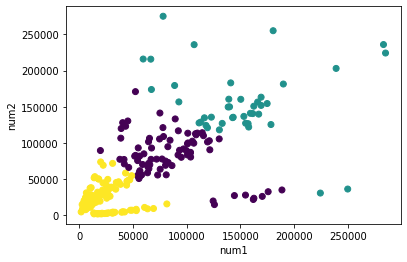

In [ ]:
plt.scatter(li[0],li[1],c=cluster)
plt.xlabel('num1')
plt.ylabel('num2')

Elbow method to determine optimal K and kmeans++

[1605930566095.0, 651228298364.0, 450007526831.0, 356067531378.0, 256250413026.0, 218849915579.0]


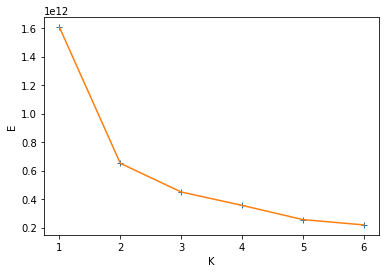

In [ ]:
def ChooseInitialCentroids(K, data):
  N = len(data)
  #choose the first centorid at random
  centroids = [data[np.random.randint(Npoints)]]
  #calclate the distances 
  for i in range(K-1):
    dist = distances(centroids[i], N, data) 
    dist /= sum(dist)
    idx = np.random.choice(N, p=dist)
    centroids.append(data[idx])
  return np.array(centroids)

def Calc_E(data, centroids, cluster):
  K = len(centroids)
  E = 0
  for i in range(K):
    dist = distances(centroids[i], len(data[np.where(cluster==i)]), data[np.where(cluster==i)])
    E += sum(dist*dist)
  return E

Elist = []
for K in range(1, 7):
  centroids = ChooseInitialCentroids(K, data)
  flag = 1
  while(flag):
    ex = cluster.copy()
    for i in range(Npoints):
      dist = distances(data[i], K, centroids)
      idx = np.argmin(dist)
      cluster[i] = idx 
    for i in range(K):
      centroids[i] = data[np.where(cluster==i)].mean(axis=0)
    if np.array_equal(ex, cluster): 
      flag = 0
  Elist.append(Calc_E(data, centroids, cluster))

Klist = np.arange(1, 7)
print(Elist)
plt.plot(Klist, Elist, "+")
plt.plot(Klist, Elist)
plt.xlabel("K")
plt.ylabel("E")
plt.show()

2 적절해보임

클러스터2개 

In [ ]:
flag = 1
cluster = np.zeros(Npoints) 
K = 2
centroids = ChooseInitialCentroids(K, data)

flag = 1
ex = cluster.copy()
for i in range(Npoints):
  dist = distances(data[i], K, centroids) #calculate distance
  idx = np.argmin(dist) #find the minimum
  cluster[i] = idx #allocate the cluster

#step4: recalculate the centroids
for i in range(K):
  centroids[i] = data[np.where(cluster==i)].mean(axis=0)

#step5: termination condition
flag+=1
if flag==50: 
  flag = 0

Text(0, 0.5, 'num2')

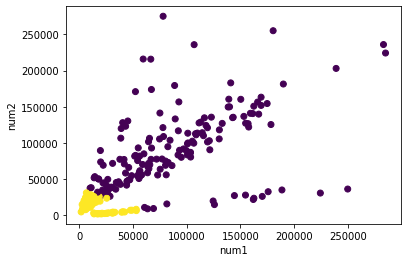

In [ ]:
plt.scatter(li[0],li[1],c=cluster)
plt.xlabel('num1')
plt.ylabel('num2')

지역별 인구수에 크게 영향을 받는 것으로 보임. 정규화하여 다시 확인하겠음

In [ ]:
filepath='/gdrive/My Drive/election2022.csv'
li=[]
for i in range(12):
  patial_data=np.loadtxt(filepath, encoding='EUC-KR', usecols=2+i, delimiter=',',dtype='float', skiprows=1)
  li.append(patial_data)
data=np.concatenate([li], axis=1).T

In [ ]:
for i in range(250):
  arr=data[i,:]
  arr=(arr-np.mean(arr)) / np.std(arr)
  data[i,:]=arr

In [ ]:
flag = 1
cluster = np.zeros(Npoints) 
K = 2
centroids = ChooseInitialCentroids(K, data)

flag = 1
ex = cluster.copy()
for i in range(Npoints):
  dist = distances(data[i], K, centroids) #calculate distance
  idx = np.argmin(dist) #find the minimum
  cluster[i] = idx #allocate the cluster

#step4: recalculate the centroids
for i in range(K):
  centroids[i] = data[np.where(cluster==i)].mean(axis=0)

#step5: termination condition
flag+=1
if flag==50: 
  flag = 0

Text(0, 0.5, 'num2')

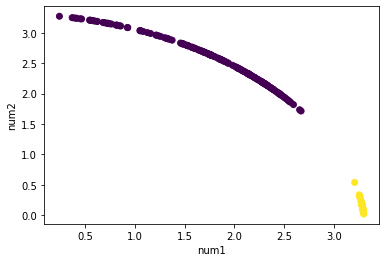

In [ ]:
plt.scatter(data[:,0],data[:,1],c=cluster)
plt.xlabel('num1')
plt.ylabel('num2')

더 잘 분리 됨

원형처럼 보이는 이유는 두 후보를 제외한 다른 후보들의 득표수가 매우 적기 때문으로 보임

Text(0, 0.5, 'num4')

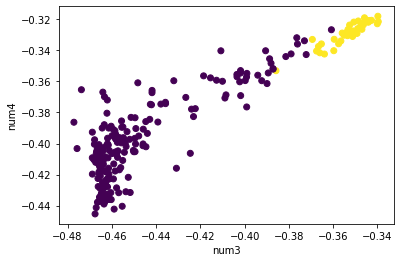

In [ ]:
plt.scatter(data[:,3],data[:,4],c=cluster)
plt.xlabel('num3')
plt.ylabel('num4')

보이듯이 다른 후보들은 원형을 그리지 않음. 또한 다른 후보에서도 잘 분리 되는 것을 확인할 수 있음.

클러스터만 유지하고 기존 데이터로 그래프 그려보겠음"

Text(0, 0.5, 'num2')

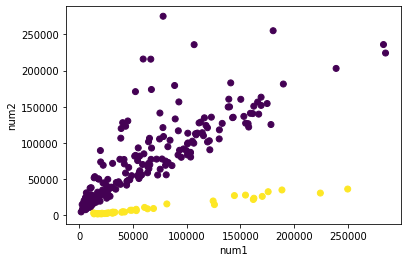

In [ ]:
plt.scatter(li[0],li[1],c=cluster)
plt.xlabel('num1')
plt.ylabel('num2')

지역별 인구수에 무관하게 지역별로 투표 성향이 확연히 분리됨